# Модуль 9: Уровни детализации (LOD)
**Тема: Вычисления, независимые от визуализации
Цель**: Понять, как работают LOD-выражения (FIXED, INCLUDE, EXCLUDE), чтобы делать расчёты на нужном уровне, не обращая внимания на то, что ты добавил в дашборд, и разобраться, чем они отличаются от табличных вычислений.

## Теория
**Что такое LOD-выражения?**
LOD (Level of Detail) — это способ в Tableau сказать: "Считай данные вот так, и плевать, какие поля я добавил в таблицу или график". Например, ты можешь посчитать общие продажи по всем данным или продажи по категориям, даже если в дашборде куча других полей, вроде регионов или дат. LOD-выражения фиксируют, на каком уровне (по каким полям) делать расчёт, и не дают визуализации его сломать. Это отличается от табличных вычислений, которые зависят от того, как ты построил таблицу.
**Типы LOD-выражений**
Мы будем использовать одну и ту же **исходную таблицу базы данных** (Superstore) для всех примеров:
| Order ID | Category | Region | Sub-Category | Customer Name | Order Date | Sales | Profit |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1 | Technology | West | Phones | Anna | 2025-01-01 | 1000 | 200 |
| 2 | Technology | East | Accessories | Anna | 2025-02-01 | 2000 | 400 |
| 3 | Furniture | West | Chairs | Bob | 2025-01-15 | 1500 | 300 |
| 4 | Furniture | East | Tables | Bob | 2025-03-01 | 500 | -50 |
* **FIXED: Считаем на фиксированном уровне**  
  * **Условие**: Хотим знать общие продажи по категории, и нам плевать, какие ещё поля есть в таблице (например, [Region] или [Sub-Category]).  
  * **Что делаем**: Пишем {FIXED [Category] : SUM([Sales])}.  
  * **Как работает**: Tableau берёт все данные и суммирует продажи только по [Category], игнорируя другие поля в дашборде (например, [Region]). Если ты добавишь [Region] или уберёшь его, результат не изменится.  
  * **Пример**:  
    * В дашборде есть [Category] и [Region].  
    * Для Technology: складываем 1000 (West) + 2000 (East) = 3000.  
    * Для Furniture: складываем 1500 (West) + 500 (East) = 2000.
**Итоговая таблица** (визуализация с [Category], [Region]):  
| Category | Region | SUM([Sales]) | {FIXED [Category] : SUM([Sales])} |
|:-:|:-:|:-:|:-:|
| Technology | West | 1000 | 3000 |
| Technology | East | 2000 | 3000 |
| Furniture | West | 1500 | 2000 |
| Furniture | East | 500 | 2000 |
**Что получаем**: Число 3000 для Technology и 2000 для Furniture в каждой строке, где есть эта 
где есть эта категория. Это как сказать: "Мне нужен общий итог по категории, и точка".
* **INCLUDE: Добавляем уровень детализации**  
  * **Условие**: Хотим посчитать сумму продаж для каждого клиента, даже если [Customer Name] не добавлен в дашборд.  
  * **Что делаем**: Пишем {INCLUDE [Customer Name] : SUM([Sales])}.  
  * **Как работает**: Tableau добавляет [Customer Name] к расчёту, даже если его нет в визуализации. Он считает сумму продаж для каждого клиента, но всё ещё учитывает поля, которые есть в дашборде (например, [Category]).  
  * **Пример**:  
    * В дашборде только [Category].  
    * Для Technology: Anna имеет продажи  1000 + 800 = 1800.
    * Для Furniture: Bob имеет продажи 500 + 1500 = 2000.
**Итоговая таблица** (визуализация с [Category]):  
| Category   | SUM([Sales]) | {INCLUDE [Customer Name] : SUM([Sales])} |
|:----------:|:------------:|:----------------------------------------:|
| Technology | 1800         | 1800 (Anna)                              |
| Furniture  | 2000         | 2000 (Bob)                               |
**Что получаем**: Сумма продаж на клиента в каждой категории, даже если клиентов не видно в дашборде. Это как сказать: "Покажи мне, сколько каждый клиент купил в категории".

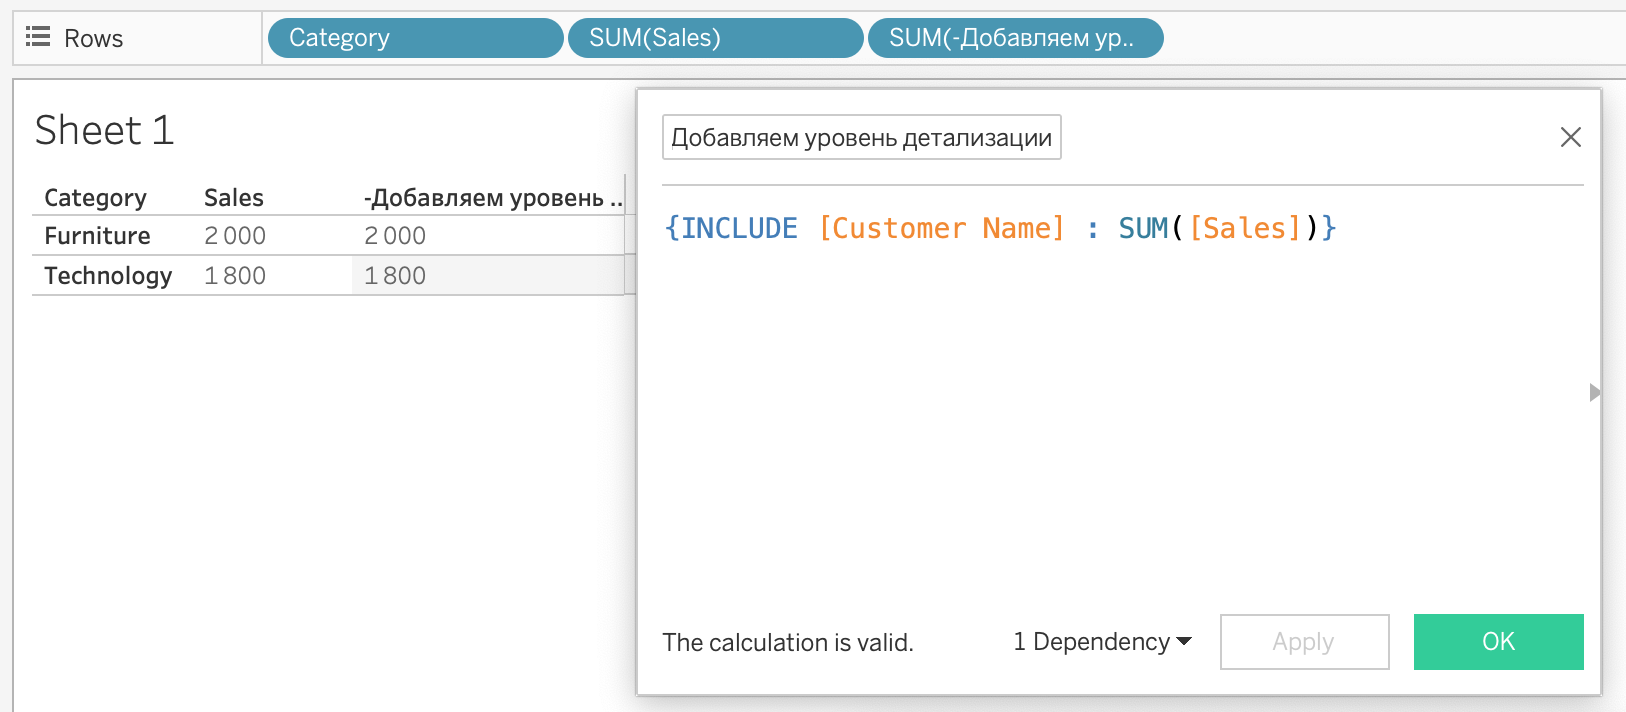

* **EXCLUDE: Убираем лишние детали**  
  * **Условие**: Хотим видеть общие продажи по категории, даже если в дашборде есть [Sub-Category].  
  * **Что делаем**: Пишем {EXCLUDE [Sub-Category] : SUM([Sales])}.  
  * **Как работает**: Tableau игнорирует [Sub-Category], даже если оно есть в визуализации, и считает сумму продаж только по [Category].  
  * **Пример**:  
    * В дашборде есть [Category] и [Sub-Category].  
    * Для Technology: Phones (1000) + Accessories (2000) = 3000.  
    * Для Furniture: Chairs (1500) + Tables (500) = 2000.
**Итоговая таблица** (визуализация с [Category], [Sub-Category]):  
| Category | Sub-Category | SUM([Sales]) | {EXCLUDE [Sub-Category] : SUM([Sales])} |
|:-:|:-:|:-:|:-:|
| Technology | Phones | 1000 | 3000 |
| Technology | Accessories | 2000 | 3000 |
| Furniture | Chairs | 1500 | 2000 |
| Furniture | Tables | 500 | 2000 |
**Что получаем**: Общие продажи по категории, как будто [Sub-Category] нет в дашборде. Это как сказать: "Забудь про подкатегории, дай мне только итог по категории".


⠀**Как LOD работают с фильтрами?**  
* **Фильтры в рабочем листе (визуализации)**: LOD игнорирует фильтры, которые ты добавил в дашборд (например, фильтр [Region] = "West" в рабочем листе). Это значит, что {FIXED [Category] : SUM([Sales])} всё равно посчитает продажи по всем регионам, даже если ты фильтруешь только West.  
* **Фильтры на уровне Data Source**: LOD *учитывает* фильтры, заданные на уровне источника данных (Data Source или Extract). Если в Data Source ты отфильтровал данные, чтобы оставить только 2025 год, то LOD будет считать только по этим данным.  
  * **Пример**: Если в Data Source фильтр [Order Date] = 2025, то {FIXED : SUM([Sales])} посчитает продажи только за 2025 год, игнорируя любые фильтры в рабочем листе.
* **Совет**: Всегда проверяй, какие фильтры стоят в Data Source, чтобы понять, какие данные попадают в LOD-расчёт.

⠀**Сравнение LOD с табличными вычислениями**  
| **Что сравниваем** | **LOD-выражения** | **Табличные вычисления** |
|:-:|:-:|:-:|
| **Зависит ли от дашборда?** | Не зависит. Ты сам задаёшь, по каким полям считать (например, только по [Category]). Если добавить или убрать поля в дашборде, результат LOD не изменится. | Зависит. Если ты добавляешь или убираешь поля в таблицу, результат меняется. Например, PERCENT_OF_TOTAL пересчитает долю, если добавить [Category]. |
| **Когда работает?** | Считает на уровне данных, до того, как Tableau строит график. Это как заранее посчитать итог в базе. | Считает уже в готовой таблице или графике, как будто ты делаешь расчёт в Excel. |
| **Зачем нужен?** | Чтобы получить стабильный результат. Например, сравнить продажи региона с общими продажами, даже если в дашборде куча полей. | Чтобы быстро посчитать что-то вроде нарастающего итога или ранга, но только в текущей таблице. |
| **Как с фильтрами?** | Игнорирует фильтры в рабочем листе, но учитывает фильтры Data Source. Например, {FIXED : SUM([Sales])} посчитает по всем данным, даже если фильтр [Region] = "West" в дашборде. | Учитывает фильтры в рабочем листе, но можно настроить фильтр табличного вычисления, чтобы показать только часть результата (например, топ-5). |
| **Что проще?** | Сначала кажутся сложными, но дают точный контроль. Используй, если нужно что-то вроде "доля региона от общего итога". | Проще для быстрых расчётов, но могут запутать, если дашборд часто меняется. |
**Почему это важно?**
LOD-выражения — это как чит-код для сложных задач. Они позволяют считать данные так, как тебе нужно, даже если дашборд набит разными полями. Хочешь сравнить продажи одного региона со всеми продажами? Или узнать средний чек клиента, не показывая клиентов? LOD это сделает. Они мощнее табличных вычислений, потому что дают стабильный результат, независимо от того, как ты крутишь дашборд.

## Примеры формул с таблицами
**Исходная таблица базы данных** (та же, что выше):  
| Order ID | Category | Region | Sub-Category | Customer Name | Order Date | Sales | Profit |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1 | Technology | West | Phones | Anna | 2025-01-01 | 1000 | 200 |
| 2 | Technology | East | Accessories | Anna | 2025-02-01 | 2000 | 400 |
| 3 | Furniture | West | Chairs | Bob | 2025-01-15 | 1500 | 300 |
| 4 | Furniture | East | Tables | Bob | 2025-03-01 | 500 | -50 |
* **FIXED: Общие продажи по всем данным**  
  * **Зачем**: Хотим знать, сколько всего продаж, чтобы сравнить с продажами по регионам.  
  * **Формула**: {FIXED : SUM([Sales])}  
  * **Что делает**: Считает сумму продаж по всей базе, игнорируя любые поля в дашборде и фильтры в рабочем листе.  
**Итоговая таблица** (визуализация с [Region], фильтр в рабочем листе: [Region] = "West"):  
| Region | SUM([Sales]) | {FIXED : SUM([Sales])} |
|:-:|:-:|:-:|
| West | 2500 | 5000 |
**Результат**: Общие продажи = 1000 + 2000 + 1500 + 500 = 5000, даже с фильтром [Region] = "West".  

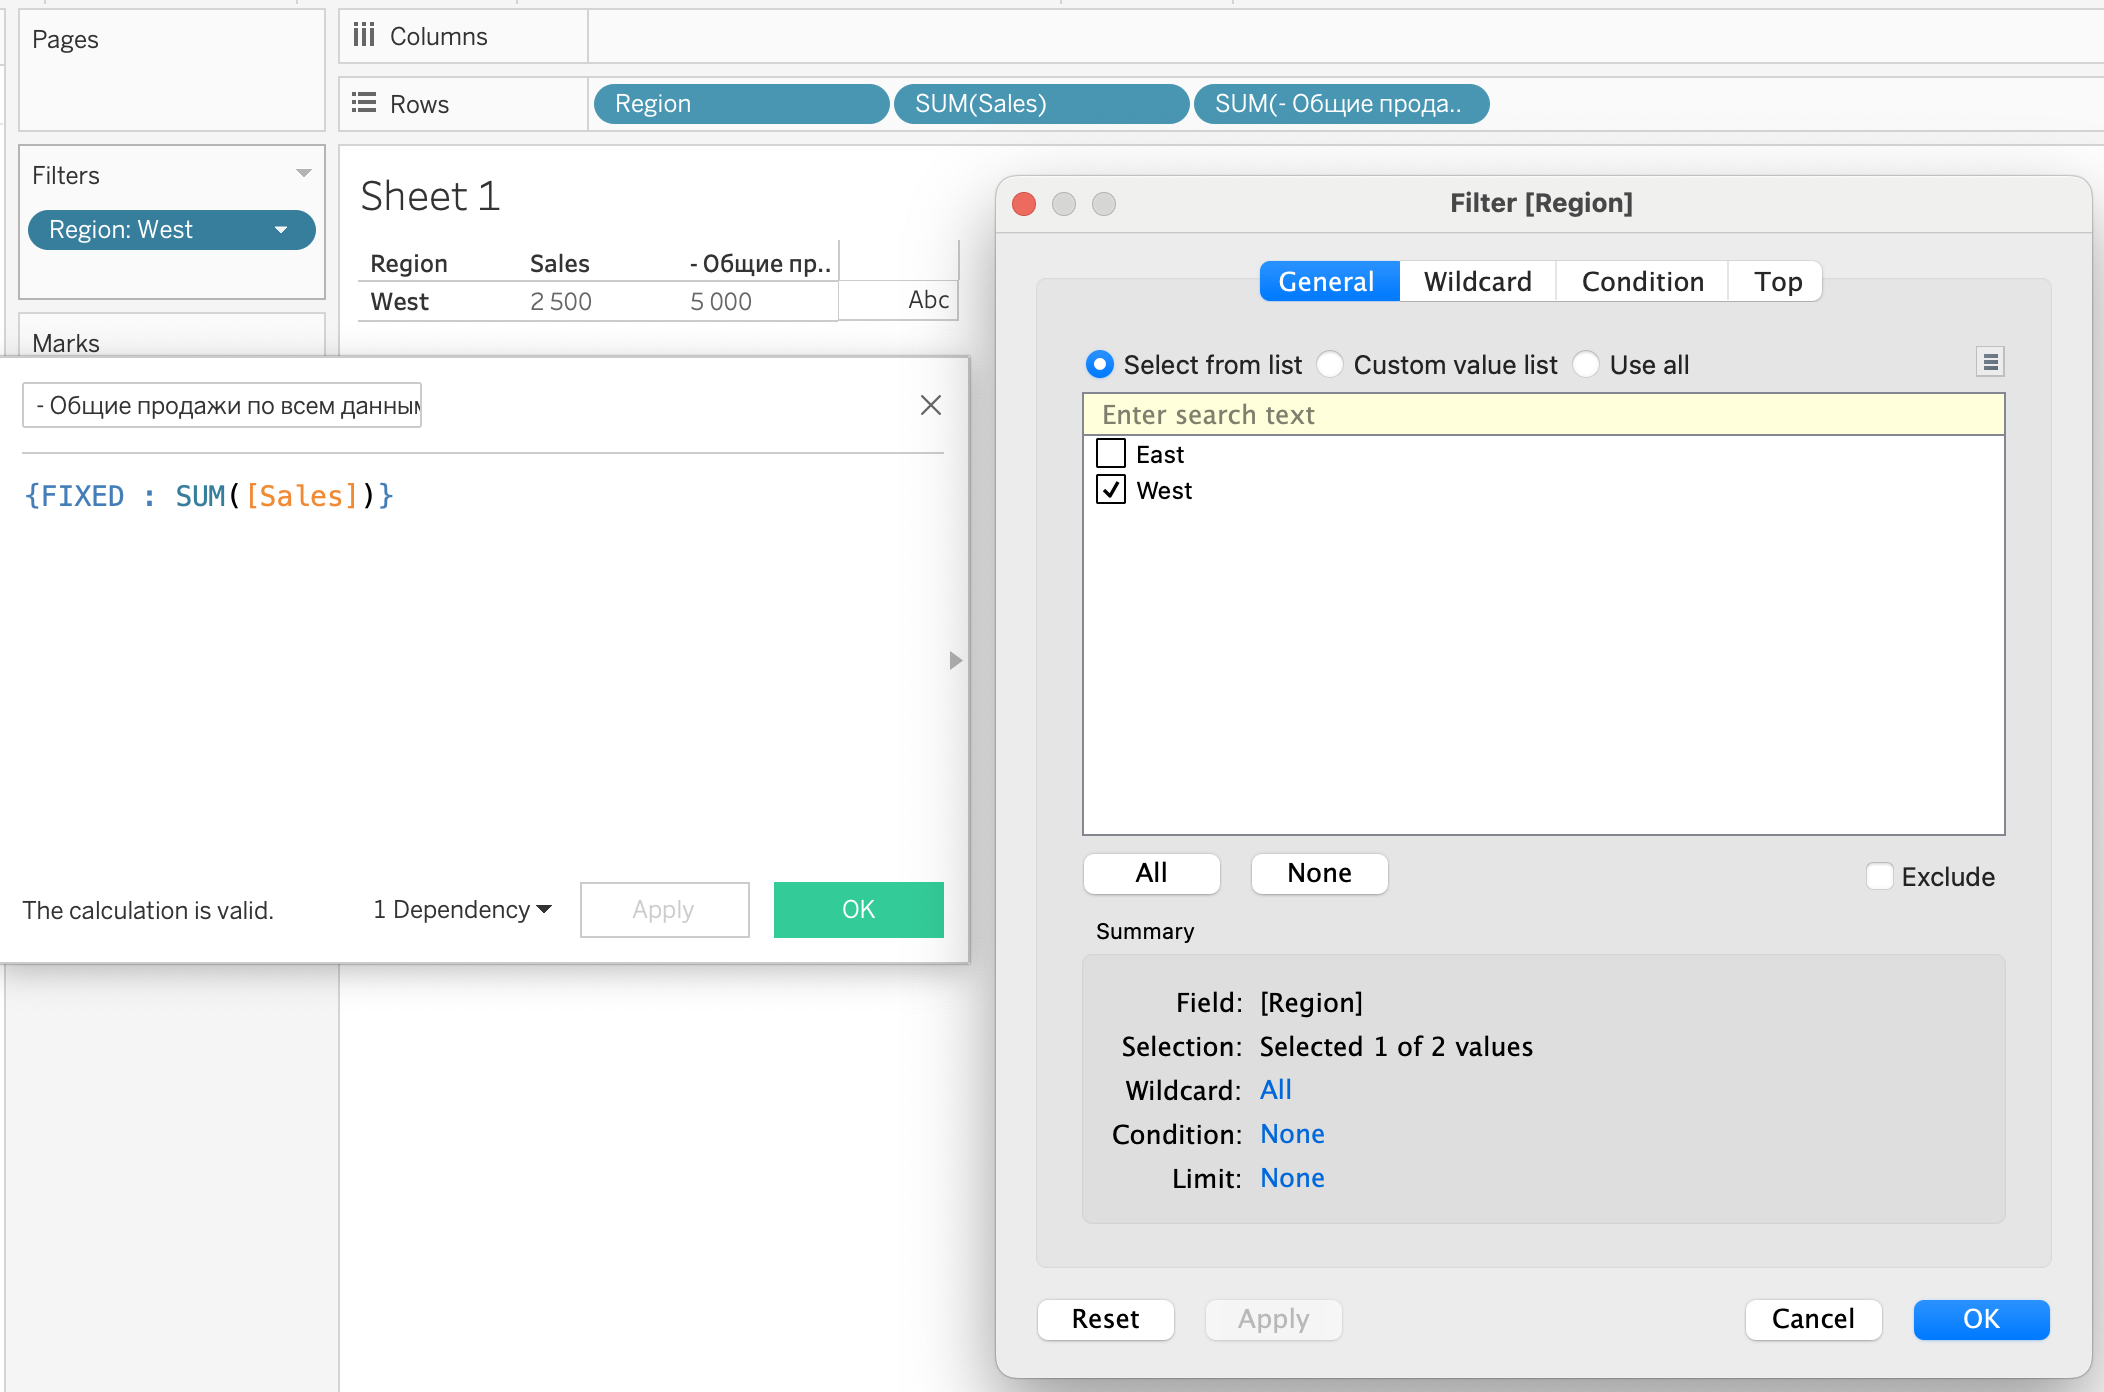

* **Примечание**: Если в Data Source стоит фильтр [Order Date] = 2025, то LOD учтёт только эти данные.
* **FIXED: Продажи по категориям**  
  * **Зачем**: Хотим видеть общие продажи категории, независимо от регионов или подкатегорий в дашборде.  
  * **Формула**: {FIXED [Category] : SUM([Sales])}  
  * **Что делает**: Считает сумму продаж для каждой категории, игнорируя другие поля и фильтры в рабочем листе.  
**Итоговая таблица** (визуализация с [Category], [Region]):  
| Category | Region | SUM([Sales]) | {FIXED [Category] : SUM([Sales])} |
|:-:|:-:|:-:|:-:|
| Technology | West | 1000 | 3000 |
| Technology | East | 2000 | 3000 |
| Furniture | West | 1500 | 2000 |
| Furniture | East | 500 | 2000 |
**Результат**: Technology = 3000, Furniture = 2000, даже если в дашборде есть [Region].

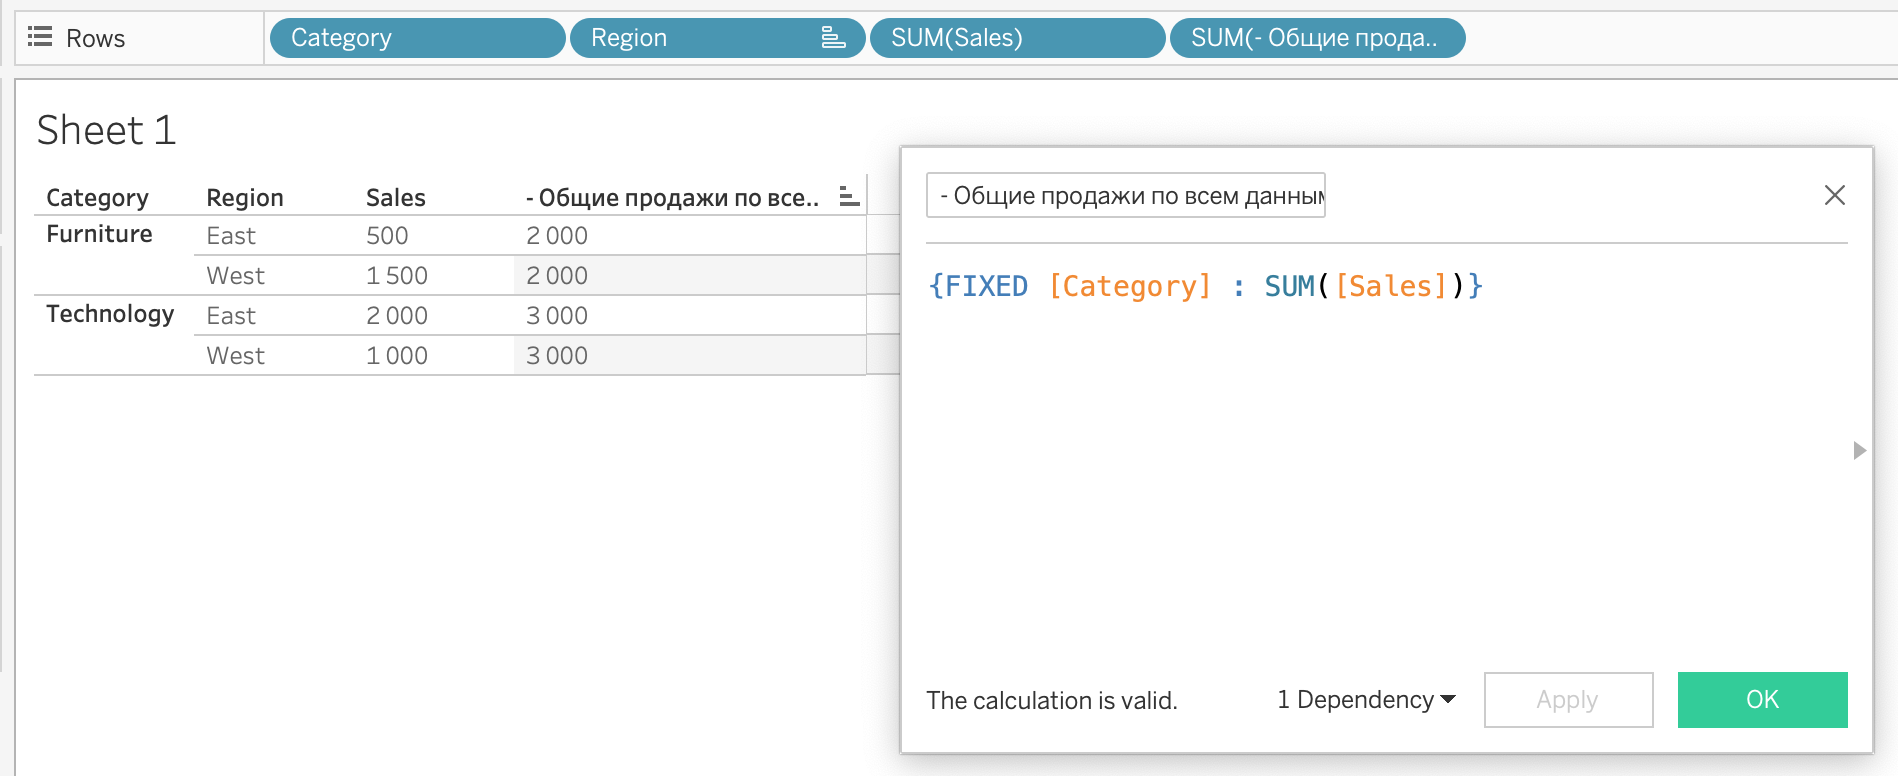

* **INCLUDE: Средние продажи на клиента**  
  * **Зачем**: Хотим знать, сколько в среднем каждый клиент покупает в категории, даже если [Customer Name] не в дашборде.  
  * **Формула**: {INCLUDE [Customer Name] : SUM([Sales])}  
  * **Что делает**: Считает сумму продаж для каждого клиента, но учитывает [Category], если оно в дашборде.  
**Итоговая таблица** (визуализация с [Category]):  
| Category | SUM([Sales]) | {INCLUDE [Customer Name] : SUM([Sales])} |
|:-:|:-:|:-:|
| Technology | 3000 | 3000 (Anna: 1000 + 2000) |
| Furniture | 2000 | 2000 (Bob: 1500 + 500) |
**Результат**: Показывает сумму продаж на клиента в каждой категории.

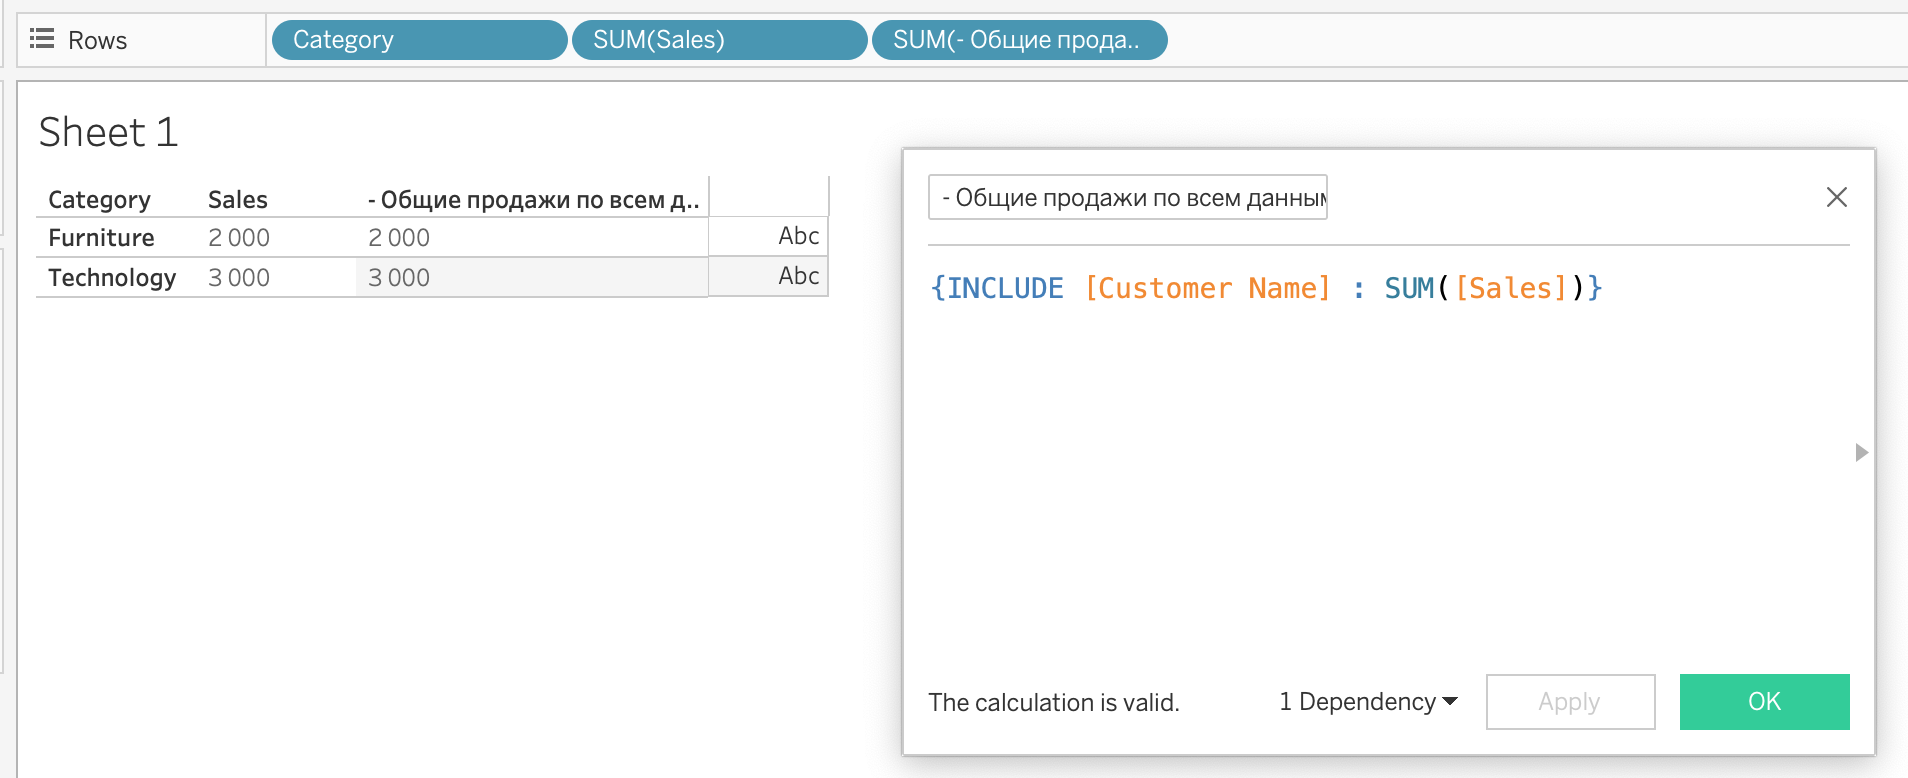

* **EXCLUDE: Продажи без подкатегорий**  
  * **Зачем**: Хотим видеть продажи по категории, игнорируя [Sub-Category] в дашборде.  
  * **Формула**: {EXCLUDE [Sub-Category] : SUM([Sales])}  
  * **Что делает**: Считает сумму продаж по [Category], убирая влияние [Sub-Category].  
**Итоговая таблица** (визуализация с [Category], [Sub-Category]):  
| Category | Sub-Category | SUM([Sales]) | {EXCLUDE [Sub-Category] : SUM([Sales])} |
|:-:|:-:|:-:|:-:|
| Technology | Phones | 1000 | 3000 |
| Technology | Accessories | 2000 | 3000 |
| Furniture | Chairs | 1500 | 2000 |
| Furniture | Tables | 500 | 2000 |
**Результат**: Technology = 3000, Furniture = 2000, независимо от [Sub-Category].

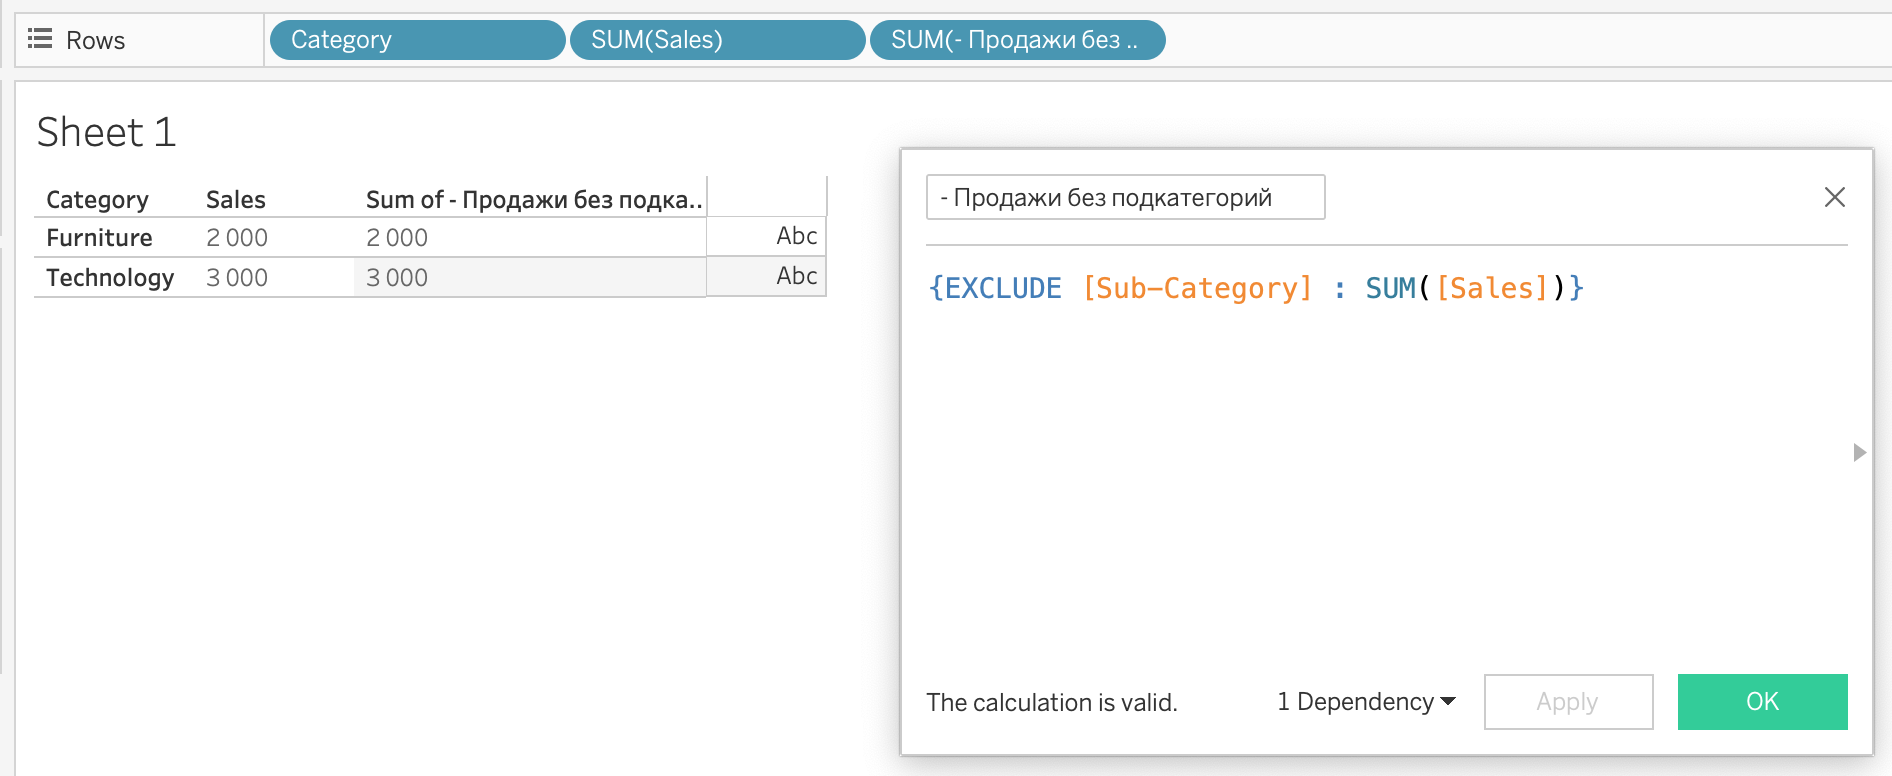

* **FIXED: Доля продаж региона от общего итога**  
  * **Зачем**: Хотим знать, какую часть от всех продаж составляет каждый регион.  
  * **Формула**: SUM([Sales]) / {FIXED : SUM([Sales])}  
  * **Что делает**: Делит продажи региона на общие продажи, игнорируя фильтры в рабочем листе.  
**Итоговая таблица** (визуализация с [Region]):  
| Region | SUM([Sales]) | SUM([Sales]) / {FIXED : SUM([Sales])} |
|:-:|:-:|:-:|
| West | 2500 | 0.5 (2500 / 5000) |
| East | 2500 | 0.5 (2500 / 5000) |
**Результат**: West = 50%, East = 50%.

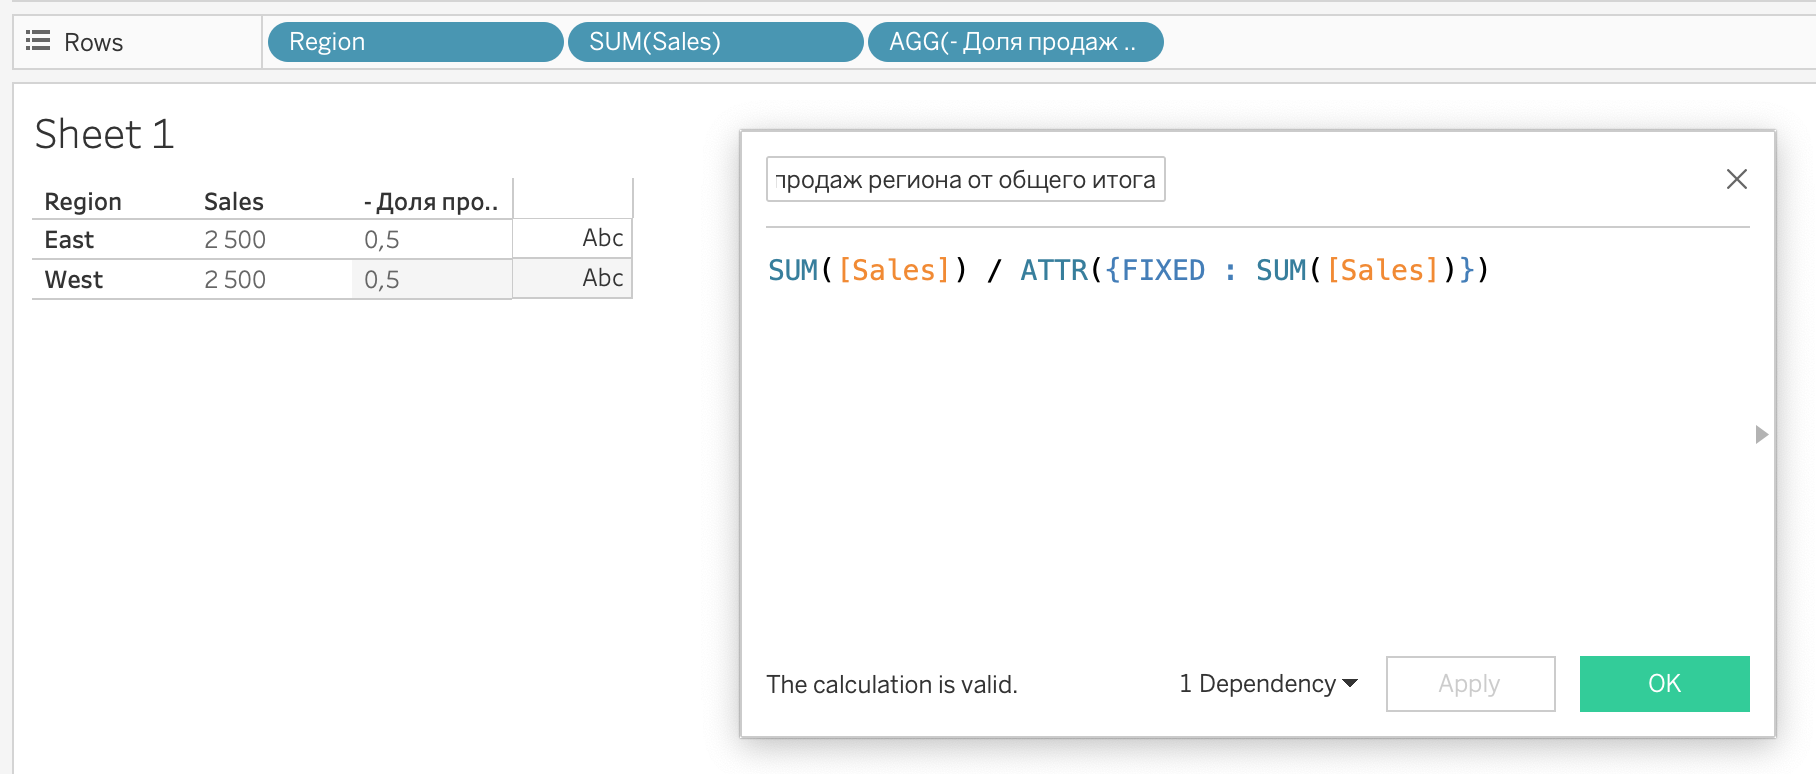

* **INCLUDE: Средний чек клиента в категории**  
  * **Зачем**: Хотим знать среднюю сумму заказа на клиента в каждой категории.  
  * **Формула**: {INCLUDE [Customer Name] : SUM([Sales])} / {INCLUDE [Customer Name] : COUNTD([Order ID])}  
  * **Что делает**: Считает сумму продаж и количество заказов на клиента, затем делит для среднего чека.  
**Итоговая таблица** (визуализация с [Category]):  
| Category | SUM([Sales]) | {INCLUDE [Customer Name] : SUM([Sales])} / {INCLUDE [Customer Name] : COUNTD([Order ID])} |
|:-:|:-:|:-:|
| Technology | 3000 | 1500 (Anna: 3000 / 2 заказа) |
| Furniture | 2000 | 1000 (Bob: 2000 / 2 заказа) |
**Результат**: Technology = 1500, Furniture = 1000.

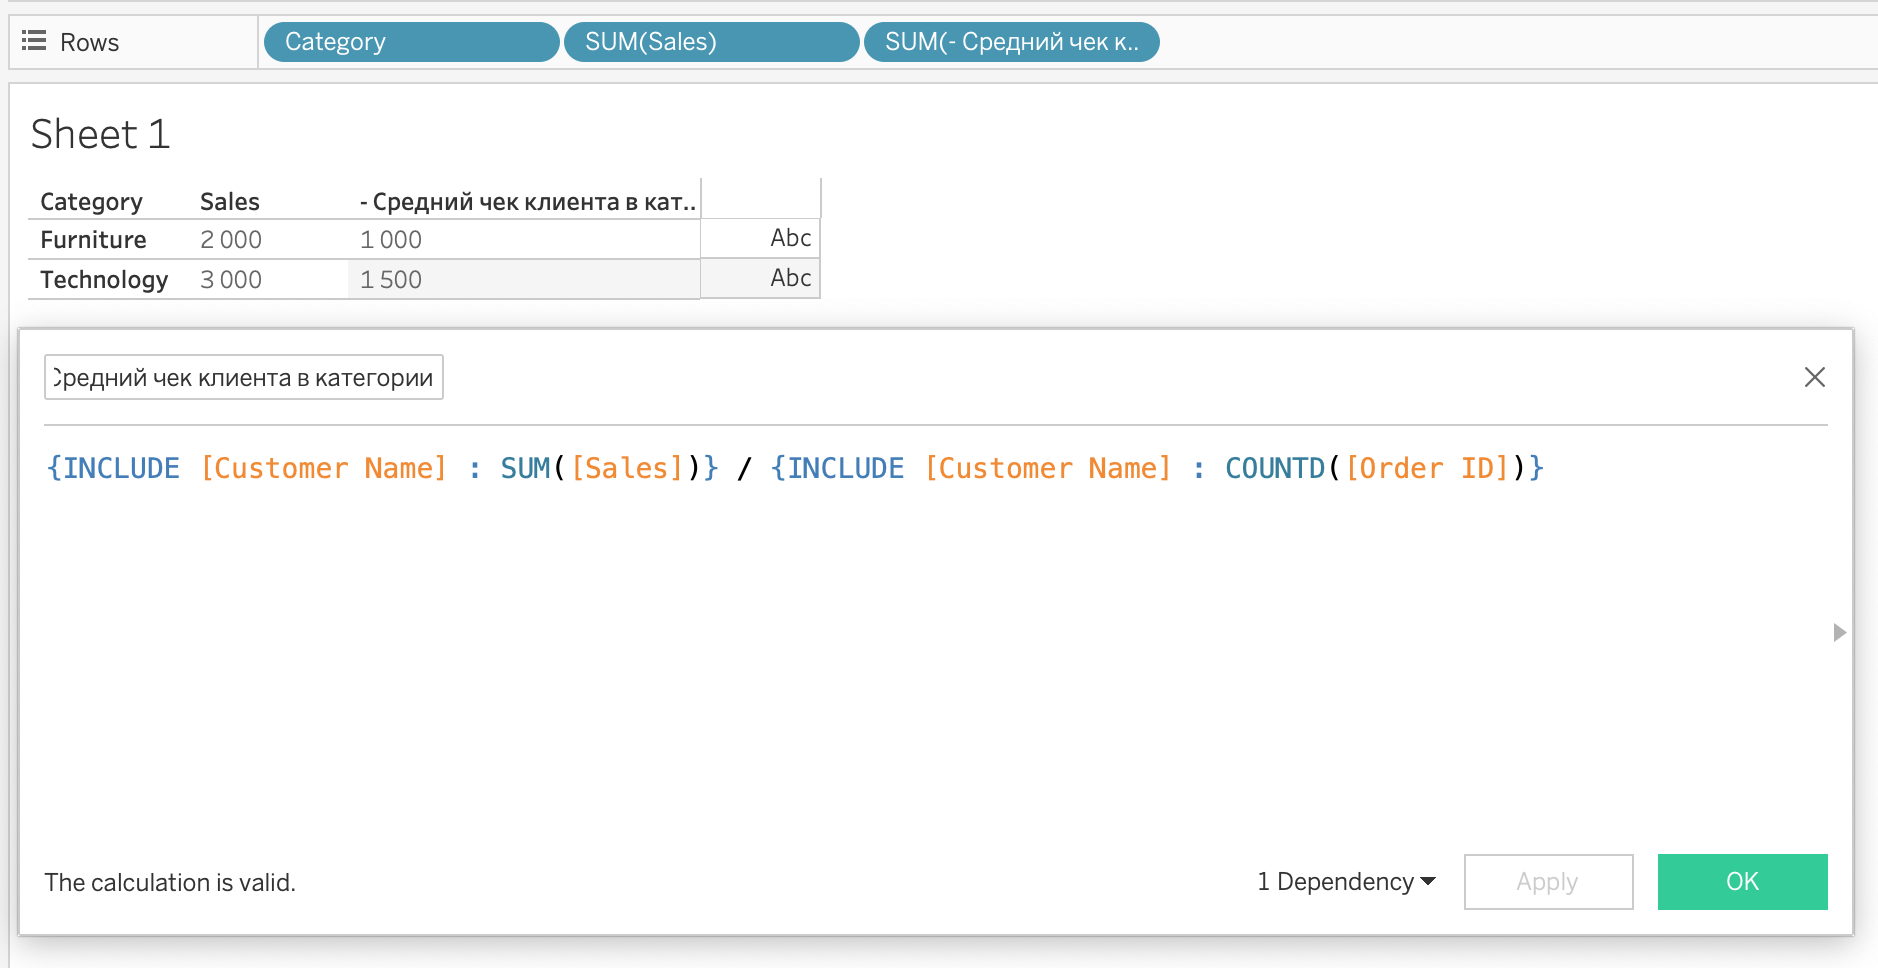

* **EXCLUDE: Средняя прибыль без региона**  
  * **Зачем**: Хотим видеть среднюю прибыль по категории, игнорируя [Region].  
  * **Формула**: {EXCLUDE [Region] : AVG([Profit])}  
  * **Что делает**: Считает среднюю прибыль по [Category], убирая влияние [Region].  
**Итоговая таблица** (визуализация с [Category], [Region]):  
| Category | Region | AVG([Profit]) | {EXCLUDE [Region] : AVG([Profit])} |
|:-:|:-:|:-:|:-:|
| Technology | West | 200 | 300 ((200 + 400) / 2) |
| Technology | East | 400 | 300 |
| Furniture | West | 300 | 125 ((300 + -50) / 2) |
| Furniture | East | -50 | 125 |
**Результат**: Technology = 300, Furniture = 125.

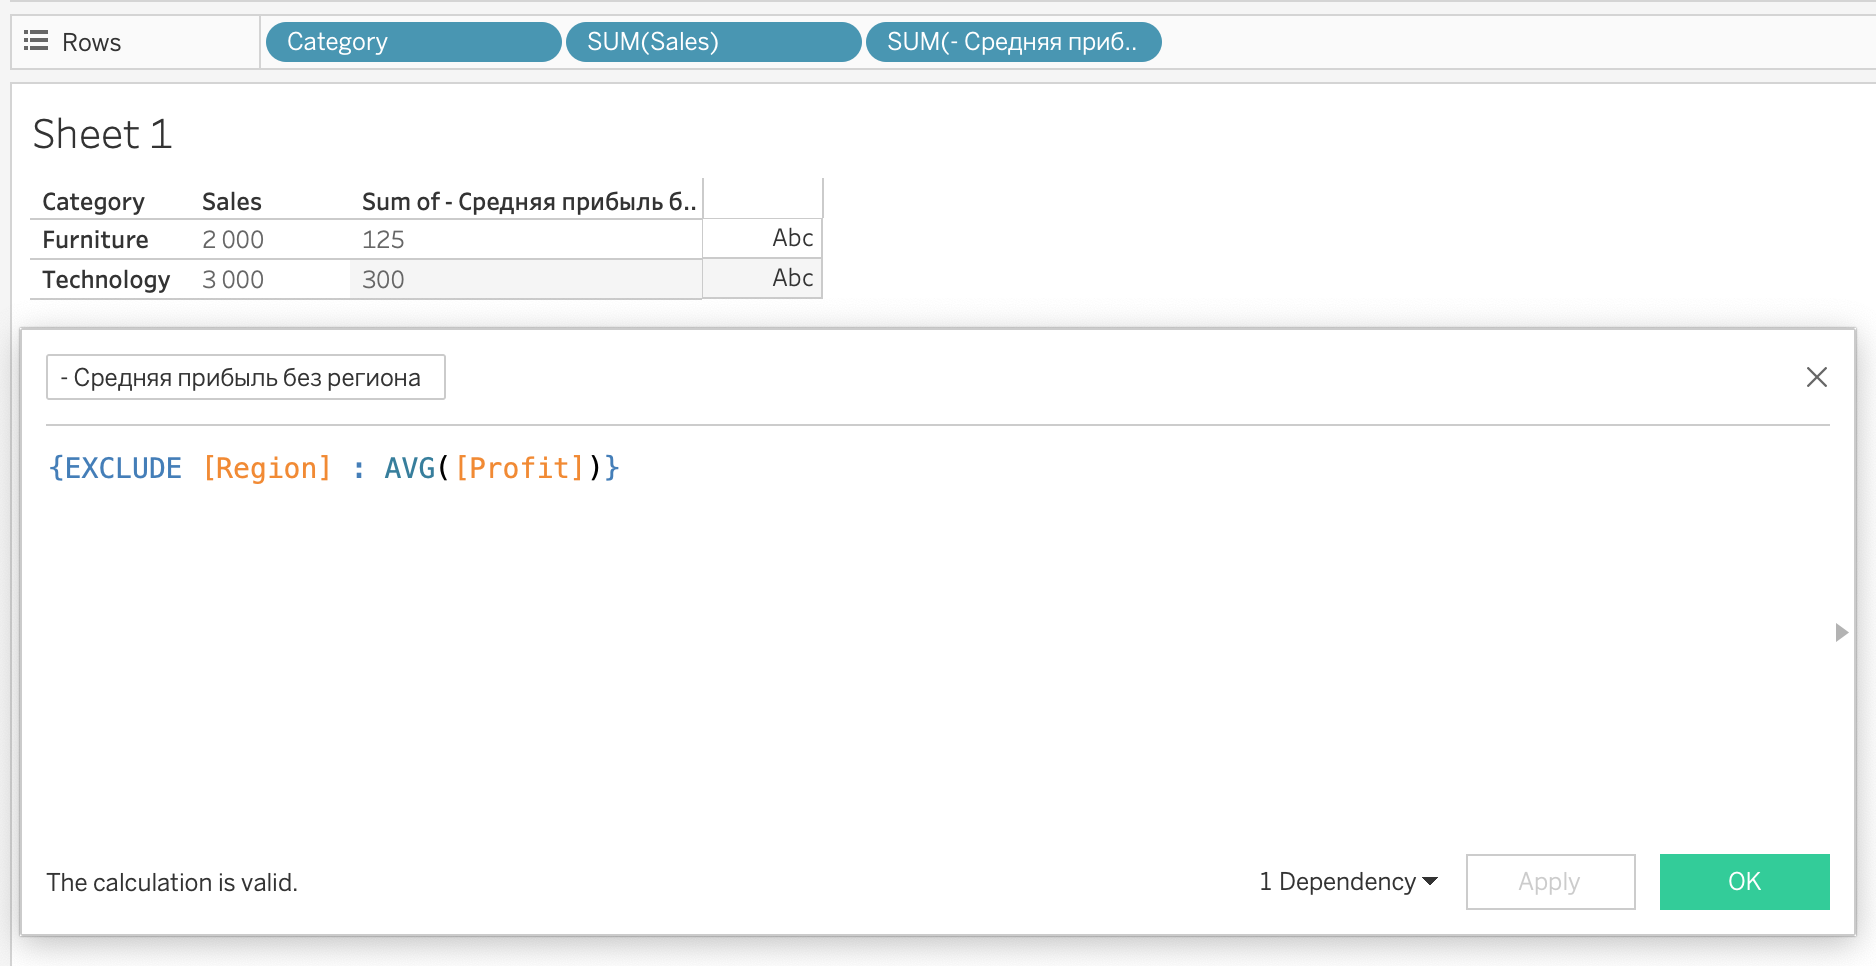

* **FIXED с датами: Доля продаж за последний квартал**  
  * **Зачем**: Хотим знать, какую долю продаж категории составляют продажи за последний квартал (от 23 июня 2025).  
  * **Формула**:   SUM(IF DATEDIFF('quarter', [Order Date], TODAY()) <= 1 THEN [Sales] ELSE 0 END) / 
    ATTR({FIXED [Category] : SUM(IF DATEDIFF('quarter', [Order Date], TODAY()) <= 1 THEN [Sales] ELSE 0 END)})
  * **Что делает**: Считает продажи за 2-й квартал 2025 и делит на общие продажи категории за этот период.  
**Итоговая таблица** (визуализация с [Category]):  
| Category | SUM([Sales]) | Доля за последний квартал |
|:-:|:-:|:-:|
| Technology | 2000 | 1.0 (2000 / 2000) |
| Furniture | 500 | 1.0 (500 / 500) |
**Результат**: Все заказы с марта по июнь 2025 = 100%.

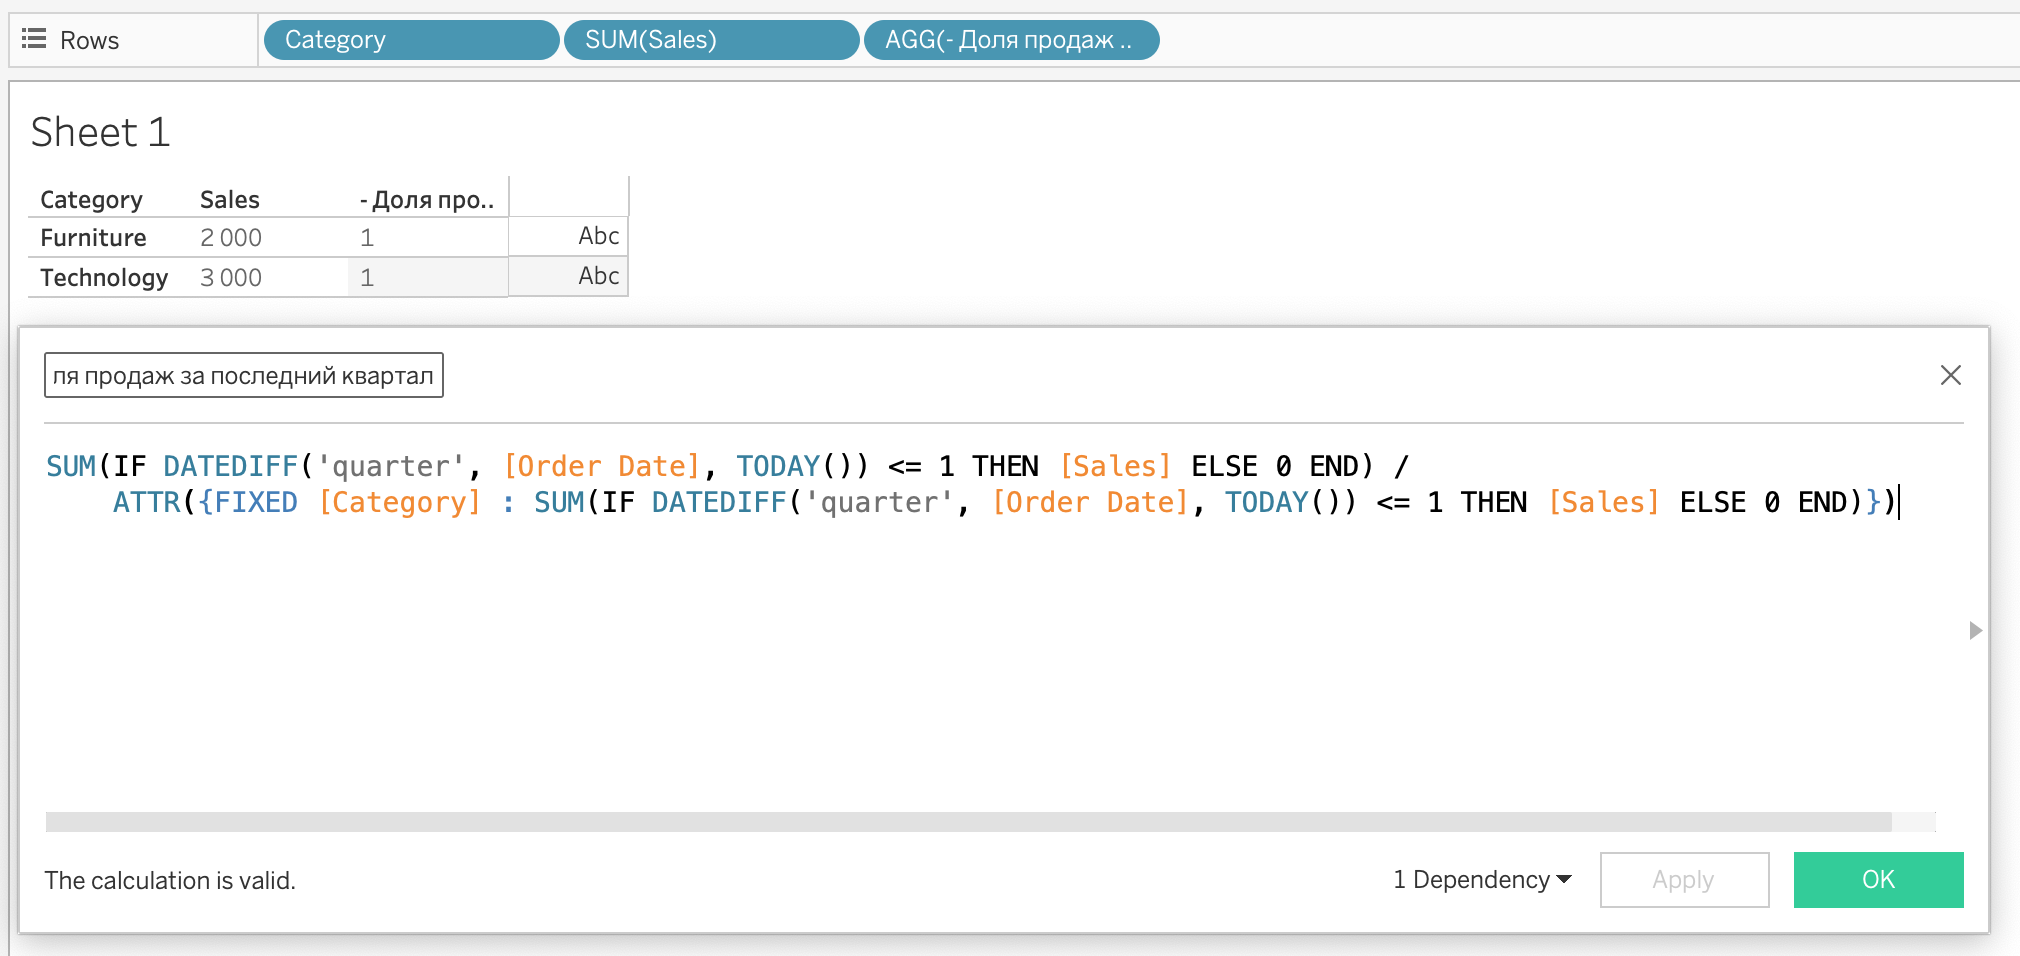

## Рекомендации для новичков
* **Думай, что тебе нужно**: Перед LOD реши, на каком уровне считать (например, по всем данным, по категориям или клиентам).  
* **Проверяй в таблице**: Построй таблицу с [Category] или [Region] и сравни SUM([Sales]) с LOD, чтобы понять, как он работает.  
* **Сравнивай с табличными вычислениями**: Если тебе нужен нарастающий итог или ранг, попробуй RUNNING_TOTAL или RANK вместо LOD (см. Модуль 8).  
* **Обрабатывай NULL**: Пиши ZN(SUM([Sales])), чтобы не было дыр в расчётах (см. Модуль 2).  
* **Смотри на фильтры**: LOD игнорирует фильтры в рабочем листе, но учитывает фильтры Data Source (например, [Year] = 2025). Проверь Data Source, чтобы знать, какие данные в расчёте.  
* **Пиши комментарии**: Добавляй // Сумма по категориям или /* Игнорирует регион */ в формулы, чтобы не запутаться.  
* **Не усложняй**: Если задача решается простым SUM([Sales]), не лепи LOD (см. Модуль 4).  
* **Тестируй на малых данных**: Сложные LOD могут тормозить на больших датасетах, проверяй на маленькой выборке.

## Почему это важно?
LOD-выражения — это как нож для данных: они режут их так, как ты хочешь, не обращая внимания на то, что творится в дашборде. Хочешь знать, сколько регион продаёт по сравнению со всеми продажами? Или средний чек клиента без показа клиентов? LOD справятся. Они мощнее табличных вычислений, потому что дают точный результат, даже если ты добавляешь поля или фильтры в дашборд. Освоишь LOD — сможешь делать крутые отчёты и решать сложные задачи.